In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data=pd.read_csv('bread basket.csv')

In [5]:
data.shape

(21293, 4)

In [8]:
data.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [9]:
data.columns

Index(['Date', 'Time', 'Transaction', 'Item'], dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [52]:
data.DateTime = pd.to_datetime(data.DateTime)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionNo  20507 non-null  int64         
 1   Items          20507 non-null  object        
 2   DateTime       20507 non-null  datetime64[ns]
 3   Daypart        20507 non-null  object        
 4   DayType        20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 801.2+ KB


In [12]:
print('Uniquue Items: ', data['Item'].unique())
print("\n", data['Item'].unique())

Uniquue Items:  ['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry shor

In [13]:
data[(data['Item']=='Coffee')| (data['Item']=='Bread')]

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
7,2016-10-30,10:13:03,5,Coffee
9,2016-10-30,10:13:03,5,Bread
15,2016-10-30,10:19:12,7,Coffee
18,2016-10-30,10:20:51,8,Bread
...,...,...,...,...
21276,2017-04-09,13:49:21,9678,Coffee
21279,2017-04-09,14:08:37,9679,Bread
21281,2017-04-09,14:24:03,9680,Bread
21288,2017-04-09,14:32:58,9682,Coffee


In [50]:
data.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

In [16]:
data[data['Item']=='NONE']

,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE
...,...,...,...,...
21108,2017-04-08,11:54:22,9590,NONE
21122,2017-04-08,12:58:25,9599,NONE
21254,2017-04-09,12:01:07,9666,NONE
21255,2017-04-09,12:04:13,9667,NONE


In [17]:
data[data['Item']=='NONE'].shape

(786, 4)

In [18]:
data.drop(data[data['Item']=='NONE'].index, inplace=True)

In [19]:
data['Year'] = data['Date'].apply(lambda x: x.split('-')[0])
data['Month'] = data['Date'].apply(lambda x: x.split('-')[1])
data['Year'] = data['Date'].apply(lambda x: x.split('-')[2])

In [20]:
data.head()

,Date,Time,Transaction,Item,Year,Month
0,2016-10-30,09:58:11,1,Bread,30,10
1,2016-10-30,10:05:34,2,Scandinavian,30,10
2,2016-10-30,10:05:34,2,Scandinavian,30,10
3,2016-10-30,10:07:57,3,Hot chocolate,30,10
4,2016-10-30,10:07:57,3,Jam,30,10


In [23]:
most_sold = data['Item'].value_counts().head(10)
print('Most sold Item: \n')
print(most_sold)

Most sold Item: 

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Item, dtype: int64


Text(0.5, 1.0, 'Items Most Sold')

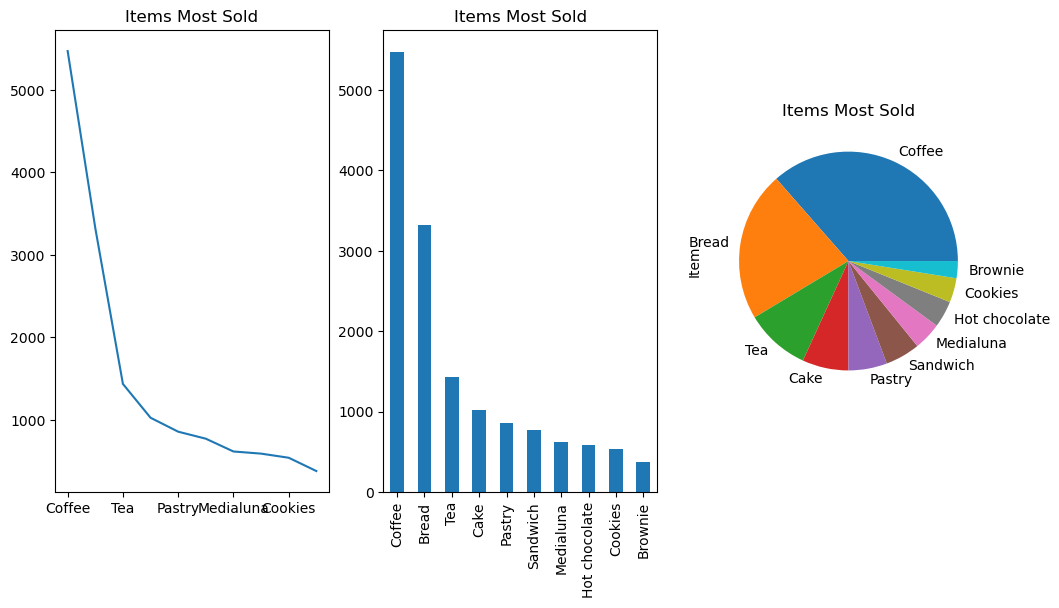

In [25]:
#visualize Items Most Sold
plt. figure(figsize=(12,6))

plt.subplot(1,3,1)
#pLt. plot (most_sold)
most_sold. plot(kind='line')
plt.title('Items Most Sold')

plt.subplot(1,3,2)
most_sold.plot(kind='bar')
plt.title('Items Most Sold')

plt.subplot(1,3,3)
most_sold.plot(kind='pie')
plt.title('Items Most Sold')

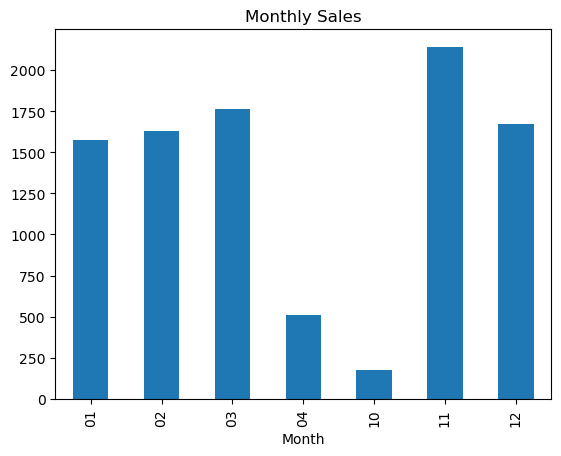

In [29]:
#Check out which months bring in the most sales.
data.groupby('Month')['Transaction'].nunique().plot(kind='bar',
                                                 title='Monthly Sales')
plt.show()

In [30]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [31]:
data

,Date,Time,Transaction,Item,Year,Month
0,2016-10-30,09:58:11,1,Bread,30,10
1,2016-10-30,10:05:34,2,Scandinavian,30,10
2,2016-10-30,10:05:34,2,Scandinavian,30,10
3,2016-10-30,10:07:57,3,Hot chocolate,30,10
4,2016-10-30,10:07:57,3,Jam,30,10
...,...,...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee,09,04
21289,2017-04-09,14:32:58,9682,Tea,09,04
21290,2017-04-09,14:57:06,9683,Coffee,09,04
21291,2017-04-09,14:57:06,9683,Pastry,09,04


In [33]:
transaction_list=[]
for i in data['Transaction'].unique():
    tlist=list(set(data[data['Transaction']==i]['Item']))
    if len(tlist) > 0:
        transaction_list.append(tlist)
print(len(transaction_list))

9465


In [34]:
transaction_list

[['Bread'],
 ['Scandinavian'],
 ['Jam', 'Cookies', 'Hot chocolate'],
 ['Muffin'],
 ['Coffee', 'Bread', 'Pastry'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Tea', 'Coffee', 'Medialuna', 'Pastry'],
 ['Bread', 'Pastry'],
 ['Bread', 'Muffin'],
 ['Medialuna', 'Scandinavian'],
 ['Bread', 'Medialuna'],
 ['Coffee', 'Pastry', 'Tea', 'Tartine', 'Jam'],
 ['Basket', 'Coffee', 'Bread'],
 ['Bread', 'Medialuna', 'Pastry'],
 ['Mineral water', 'Scandinavian'],
 ['Coffee', 'Bread', 'Medialuna'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Bread', 'Medialuna'],
 ['Coffee', 'Bread', 'Medialuna'],
 ['Jam'],
 ['Muffin', 'Scandinavian'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Jam', 'Bread'],
 ['Bread'],
 ['Basket'],
 ['Muffin', 'Scandinavian'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Scandinavian', 'Muffin'],
 ['Tea', 'Bread'],
 ['Coffee', 'Bread'],
 ['Tea', 'Bread'],
 ['Scandinavian'],
 ['Juice', 'Coffee', 'Tartine', 'Muffin'],
 ['Scandinavia

In [36]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

In [37]:
df2.sample(10)

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
2535,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4151,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8315,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6313,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6829,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8577,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6949,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
df2.shape

(9465, 94)

In [40]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
...,...,...
56,0.023666,"(Coffee, Toast)"
57,0.014369,"(Tea, Sandwich)"
58,0.010037,"(Coffee, Bread, Cake)"
59,0.011199,"(Coffee, Bread, Pastry)"


In [43]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [44]:
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [45]:
frequent_itemsets

,support,itemsets,length
0,0.036344,(Alfajores),1
1,0.016059,(Baguette),1
2,0.327205,(Bread),1
3,0.040042,(Brownie),1
4,0.103856,(Cake),1
...,...,...,...
56,0.023666,"(Coffee, Toast)",2
57,0.014369,"(Tea, Sandwich)",2
58,0.010037,"(Coffee, Bread, Cake)",3
59,0.011199,"(Coffee, Bread, Pastry)",3


In [47]:
frequent_itemsets[(frequent_itemsets['itemsets'] =={'Coffee'}) &
                  (frequent_itemsets['support'] >= 0.01)]

,support,itemsets,length
6,0.478394,(Coffee),1


In [48]:
# getting th item sets with Length =2 and support more han 16%

frequent_itemsets[(frequent_itemsets['length'] ==2) &
                  (frequent_itemsets['support'] >= 0.01)]

,support,itemsets,length
30,0.010354,"(Bread, Alfajores)",2
31,0.019651,"(Coffee, Alfajores)",2
32,0.010777,"(Bread, Brownie)",2
33,0.023349,"(Bread, Cake)",2
34,0.090016,"(Coffee, Bread)",2
35,0.014474,"(Cookies, Bread)",2
36,0.013418,"(Bread, Hot chocolate)",2
37,0.016904,"(Bread, Medialuna)",2
38,0.029160,"(Bread, Pastry)",2
39,0.017010,"(Sandwich, Bread)",2


In [50]:
rules[(rules['support'] >=0.03)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
18,(Coffee),(Medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
25,(Coffee),(Sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807


In [52]:
#Filtering the rules
rules[(rules['lift'] > 1) &
      (rules['confidence'] >= 0.05)].sort_values(['confidence'], ascending =False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [53]:
rules[rules['antecedents']==frozenset({'Coffee'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
4,(Coffee),(Brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080
6,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
13,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841
14,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749
17,(Coffee),(Juice),0.478394,0.038563,0.020602,0.043065,1.116750,0.002154,1.004705
18,(Coffee),(Medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667
20,(Coffee),(Muffin),0.478394,0.038457,0.018806,0.039311,1.022193,0.000408,1.000888
22,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740
25,(Coffee),(Sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807


In [54]:
rules[(rules['consequents']==frozenset({'Coffee'}))
      & (rules['confidence']>0.5)
      & (rules['lift']>1)].sort_values('confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [55]:
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
41,(Cake),"(Tea, Coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779
38,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
9,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
8,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
10,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
11,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
30,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699
37,(Pastry),"(Coffee, Bread)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033
36,"(Coffee, Bread)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749
